In [1]:
import numpy as np
import os

In [2]:
# Precision of fortran tag
int_precision = 'int32'
# Precision of data in input file
float_precision = 'float32'
# Precision of data in input file
logical_precision = 'int32'

In [3]:
# Initialize outputs in case file does not exist or is empty
nodata = -9999
date_time = {
    'year': nodata,
    'month': nodata,
    'day': nodata,
    'hour': nodata,
    'min': nodata,
    'sec': nodata,
    'dofyr': nodata,
    'pentad': nodata
}

obs_assim = []
obs_species = []
obs_tilenum = []
obs_lon = []
obs_lat = []
obs_obs = []
obs_obsvar = []
obs_fcst = []
obs_fcstvar = []
obs_ana = []
obs_anavar = []

# Determine machine format
machfmt = 'b'

In [4]:
# Get a list of files with a similar name in a directory
test_data = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data'
path = '/discover/nobackup/amfox/Experiments/UpT10_da_1_day/UpT10_da/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04'
#file_name = 'ASCAT_da_test.ens_avg'
#file_name = 'DAv8a.ens_avg'
file_name = 'UpT10_da.ens_avg.ldas_ObsFcstAna.20150401'
file_ext = '.bin'
files = [file for file in os.listdir(path) if file.startswith(file_name) and file.endswith(file_ext)]

print(files)

['UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_1800z.bin', 'UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_1500z.bin', 'UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_2100z.bin', 'UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_0600z.bin', 'UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_0300z.bin', 'UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_0900z.bin', 'UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_1200z.bin']


In [5]:
# Open each file in turn
mode = 'rb' if machfmt == 'b' else 'rl'

for file in files:
    with open(os.path.join(path, file), mode) as ifp:
        print ('Reading file ', file, '...')
        
        # Read N_obs and time stamp entry
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        N_obs = np.fromfile(ifp, int_precision, 1)
        N_obs = int(N_obs)
        year = np.fromfile(ifp, int_precision, 1)
        month = np.fromfile(ifp, int_precision, 1)
        day = np.fromfile(ifp, int_precision, 1)
        hour = np.fromfile(ifp, int_precision, 1)
        minute = np.fromfile(ifp, int_precision, 1)
        second = np.fromfile(ifp, int_precision, 1)
        dofyr = np.fromfile(ifp, int_precision, 1)
        pentad = np.fromfile(ifp, int_precision, 1)
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        # Populate date_time structure
        date_time = {
            'year': year,
            'month': month,
            'day': day,
            'hour': hour,
            'min': minute,
            'sec': second,
            'dofyr': dofyr,
            'pentad': pentad
        }
        
        # Read observation assim flag
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        tmp_data = np.fromfile(ifp, logical_precision, N_obs)
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        tmp_data2 = np.zeros((N_obs, 1))
        indices = np.where(tmp_data != 0)[0]
        tmp_data2[indices] = 1
        obs_assim = np.append(obs_assim, tmp_data2)
        
        # Read species information
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_species = np.append(obs_species, np.fromfile(ifp, int_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        # Read tile number information
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_tilenum = np.append(obs_tilenum, np.fromfile(ifp, int_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read longitude
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_lon = np.append(obs_lon, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read latitude
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_lat = np.append(obs_lat, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        # Read observation value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_obs = np.append(obs_obs, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_obsvar = np.append(obs_obsvar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space model forecast value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_fcst = np.append(obs_fcst, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space model forecast variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_fcstvar = np.append(obs_fcstvar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space analysis value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_ana = np.append(obs_ana, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space analysis variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_anavar = np.append(obs_anavar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        
# Close file
    ifp.close()
    
print('Total number of obs = ',len(obs_assim))

Reading file  UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_1800z.bin ...
Reading file  UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_1500z.bin ...
Reading file  UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_2100z.bin ...
Reading file  UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_0600z.bin ...
Reading file  UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_0300z.bin ...
Reading file  UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_0900z.bin ...
Reading file  UpT10_da.ens_avg.ldas_ObsFcstAna.20150401_1200z.bin ...
Total number of obs =  155454


In [6]:
smap_obs = (obs_species < 5)
ascat_obs = (obs_species > 4)

In [7]:
test = obs_ana<-1000
obs_ana[test] = 250.0

0.5925996054009648
0.2966673569876607


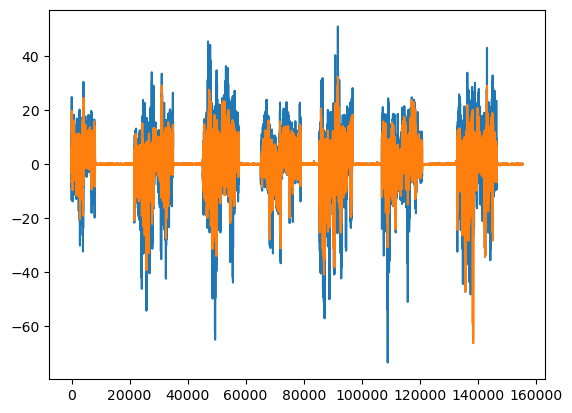

In [8]:
import matplotlib.pyplot as plt

plt.plot(obs_obs - obs_fcst)

print(np.mean(obs_obs - obs_fcst))

plt.plot(obs_obs - obs_ana)

print(np.mean(obs_obs - obs_ana))


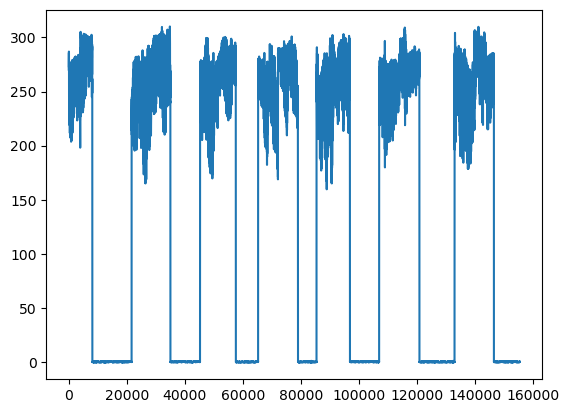

In [9]:
plt.plot(obs_obs)

155454


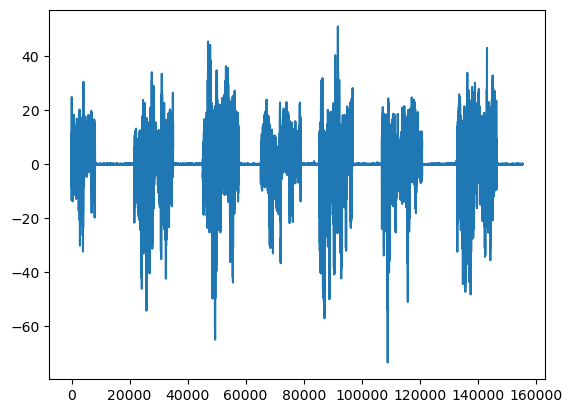

In [10]:
data1 = (obs_obs - obs_fcst)
data2 = (obs_obs - obs_ana)
plt.plot(data1)

print(obs_obs.size)


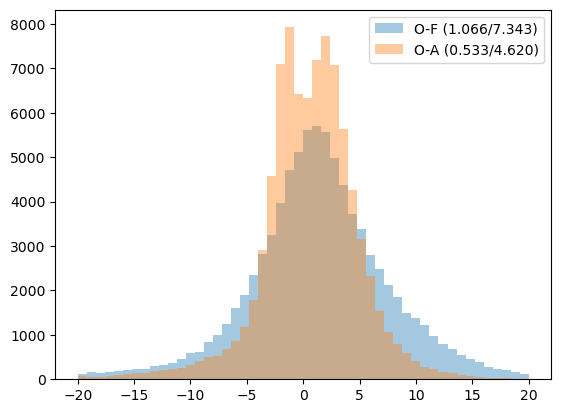

In [11]:


bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(data1[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(data1[smap_obs]), np.std(data1[smap_obs])))
n2, bins, patches = plt.hist(data2[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(data2[smap_obs]), np.std(data2[smap_obs])))

plt.legend()

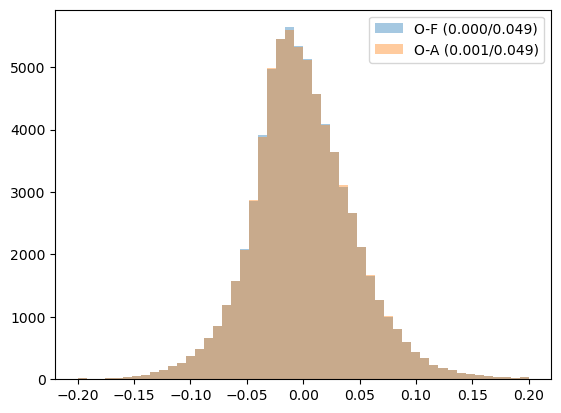

In [12]:


bin_edges = np.linspace(-10, 10, 51)
bin_edges = np.linspace(-0.2, 0.2, 51)
n1, bins, patches = plt.hist(data1[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-F ({:.3f}/{:.3f})'.format(np.mean(data1[ascat_obs]), np.std(data1[ascat_obs])))
n2, bins, patches = plt.hist(data2[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='O-A ({:.3f}/{:.3f})'.format(np.mean(data2[ascat_obs]), np.std(data2[ascat_obs])))

plt.legend()

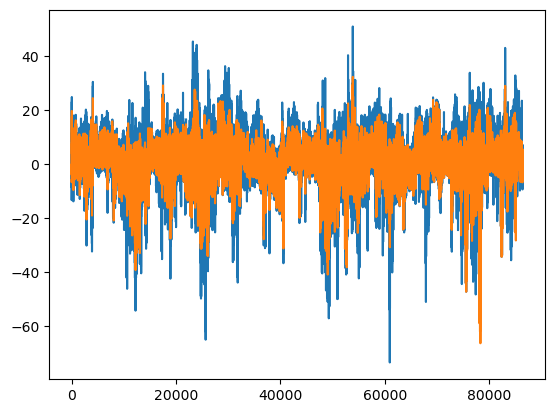

In [13]:
plt.plot(data1[smap_obs])
plt.plot(data2[smap_obs])

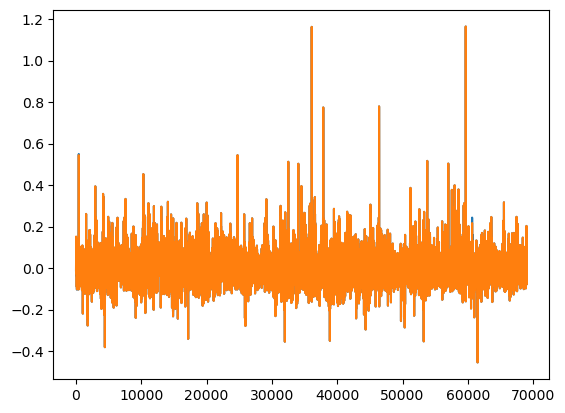

In [14]:
plt.plot(data1[ascat_obs])
plt.plot(data2[ascat_obs])


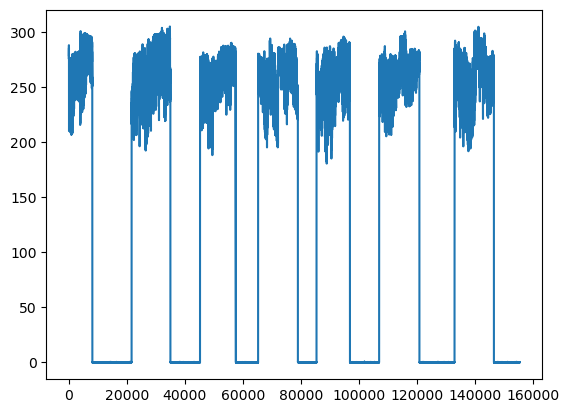

In [15]:
plt.plot(obs_ana)

In [16]:
incr = obs_ana - obs_fcst

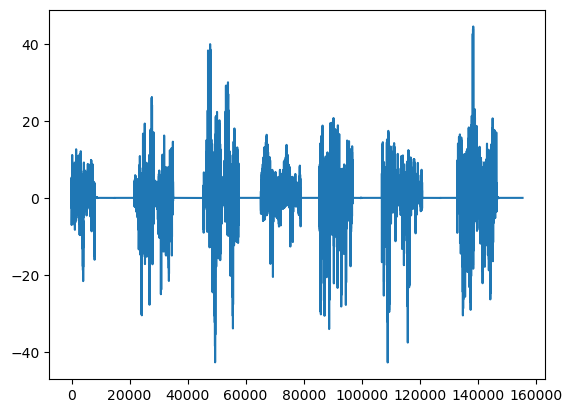

In [17]:
plt.plot(incr)

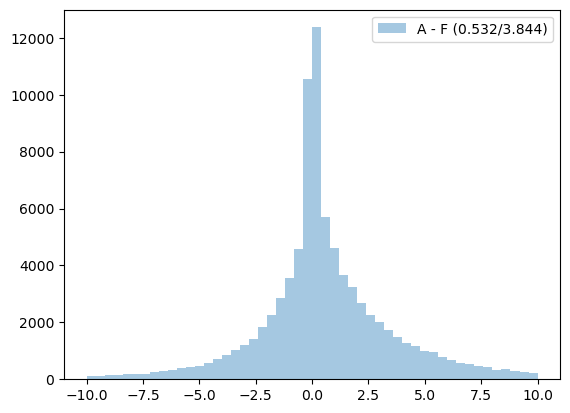

In [18]:
bin_edges = np.linspace(-10, 10, 51)
n1, bins, patches = plt.hist(incr[smap_obs], density=False, bins=bin_edges, alpha=0.4,label='A - F ({:.3f}/{:.3f})'.format(np.mean(incr[smap_obs]), np.std(incr[smap_obs])))

plt.legend()

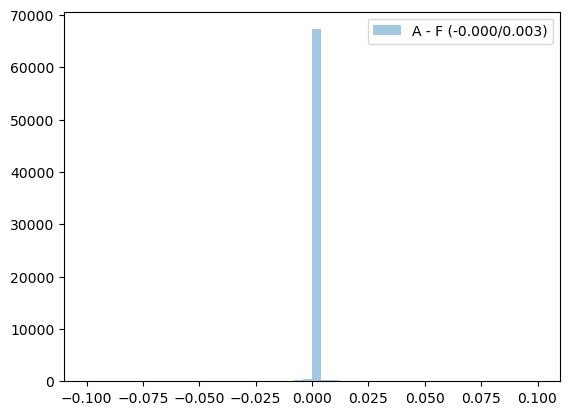

In [19]:
bin_edges = np.linspace(-0.1, 0.1, 51)
n1, bins, patches = plt.hist(incr[ascat_obs], density=False, bins=bin_edges, alpha=0.4,label='A - F ({:.3f}/{:.3f})'.format(np.mean(incr[ascat_obs]), np.std(incr[ascat_obs])))

plt.legend()